In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('placement data set.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
df=df.drop(['sl_no', 'ssc_b','hsc_b','status'], axis=1)


In [4]:
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0


In [5]:
df.isnull().sum()

gender             0
ssc_p              0
hsc_p              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            67
dtype: int64

In [6]:
#df['salary'].fillna(salary,inplace=True)
df.dropna(subset=['salary'], inplace=True)

In [7]:
df.salary

0      270000.0
1      200000.0
2      250000.0
4      425000.0
7      252000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

In [8]:
df.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

In [9]:
df['gender']=df['gender'].astype('category')
df['degree_t']=df['degree_t'].astype('category')
df['specialisation']=df['specialisation'].astype('category')
df['workex']=df['workex'].astype('category')
df['salary']=df['salary'].astype('category')
df['hsc_s']=df['hsc_s'].astype('category')
df.dtypes

gender            category
ssc_p              float64
hsc_p              float64
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
salary            category
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df['gender']=df['gender'].cat.codes
df['degree_t']=df['degree_t'].cat.codes
df['specialisation']=df['specialisation'].cat.codes
df['workex']=df['workex'].cat.codes
df['salary']=df['salary'].cat.codes
df['hsc_s']=df['hsc_s'].cat.codes

In [12]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,19
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,12
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,39
7,1,82.00,64.00,2,66.00,2,1,67.0,0,62.14,13


In [13]:
df.describe()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.675676,71.721486,69.926554,1.385135,68.740541,0.587838,0.432432,73.238041,0.358108,62.579392,18.770270
std,0.469711,8.715445,9.329268,0.565729,6.518087,0.895408,0.497096,13.729333,0.481072,5.884583,11.514023
min,0.000000,49.000000,50.830000,0.000000,56.000000,0.000000,0.000000,50.000000,0.000000,52.380000,0.000000
25%,0.000000,65.000000,63.000000,1.000000,65.000000,0.000000,0.000000,60.000000,0.000000,57.772500,11.000000
50%,1.000000,72.500000,68.000000,1.000000,68.000000,0.000000,0.000000,72.000000,0.000000,62.245000,17.000000
75%,1.000000,78.125000,75.250000,2.000000,72.422500,2.000000,1.000000,85.000000,1.000000,66.760000,28.000000
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,44.000000


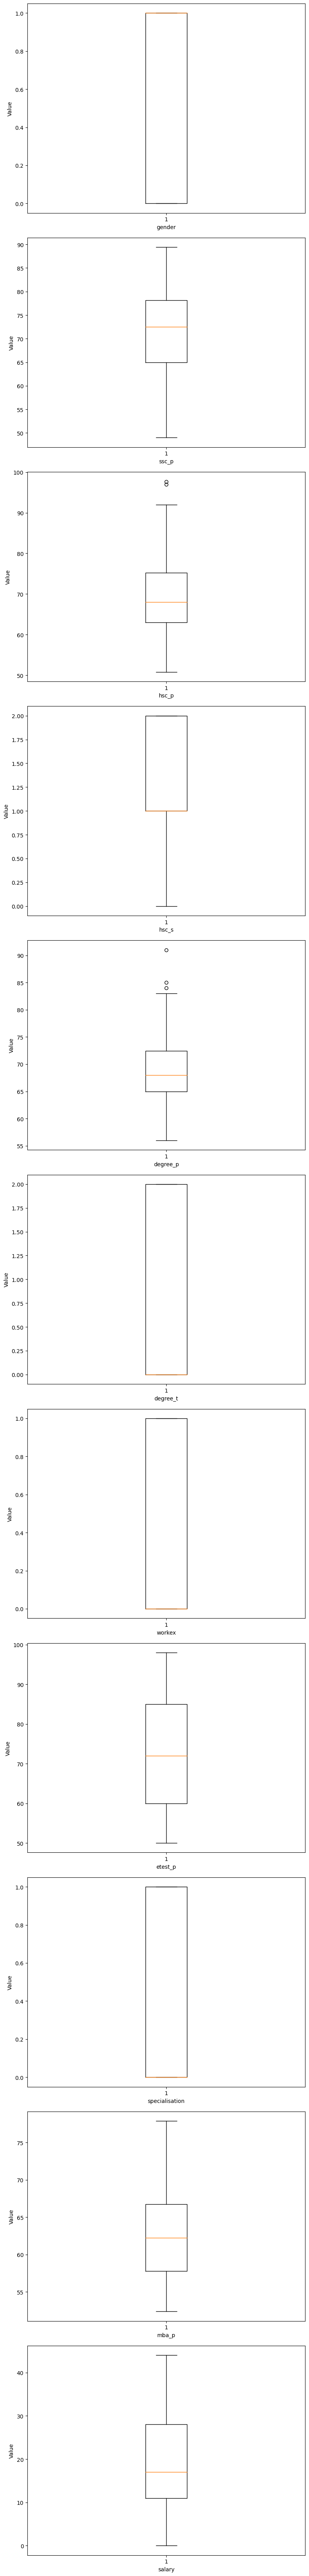

In [14]:
columns = df.columns
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 6 * len(columns)))
for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
fig.tight_layout()
plt.show()

In [15]:
df=df[~(df['hsc_p']>=87)]
df=df[~(df['hsc_p']<=50)]
df=df[~(df['degree_p']>=80)]


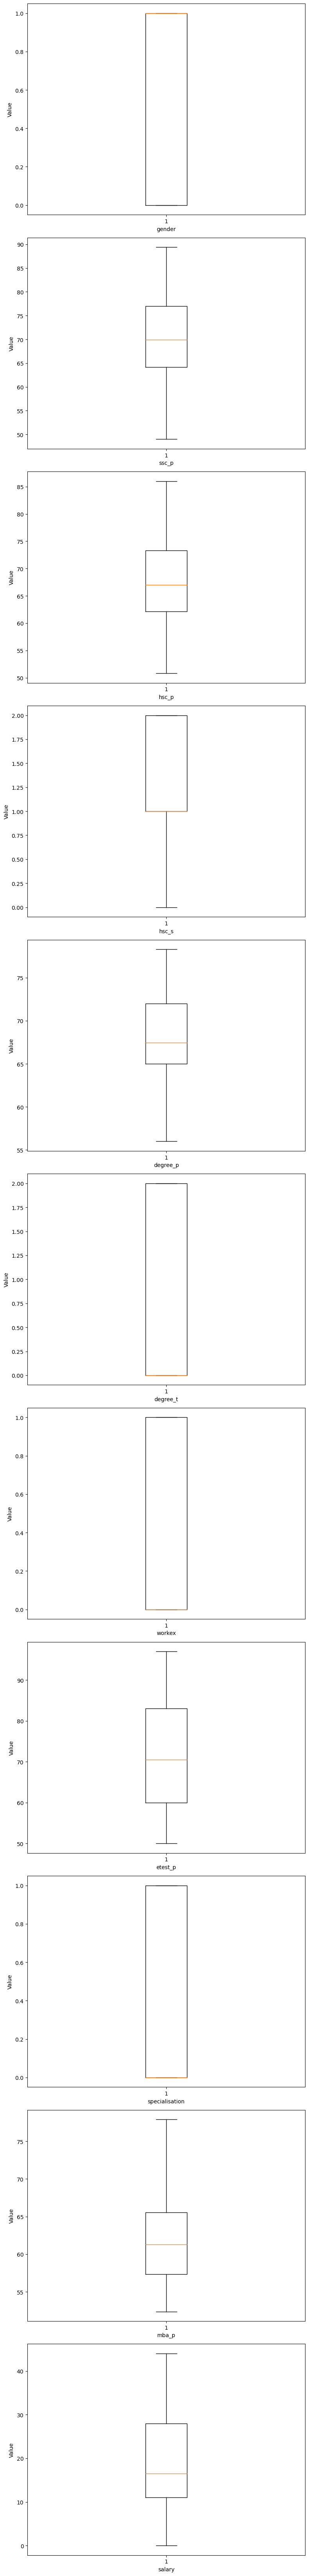

In [16]:
columns = df.columns
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 6 * len(columns)))
for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
fig.tight_layout()
plt.show()

In [17]:
df_class = df.copy()
x = df_class.iloc[:, 0:-1].values
y = df_class.iloc[:,-1].values


In [18]:
x


array([[ 1.  , 79.33, 78.33, ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  , 68.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 85.8 , 73.6 , ..., 96.8 ,  0.  , 55.5 ],
       ...,
       [ 1.  , 58.  , 60.  , ..., 74.  ,  0.  , 53.62],
       [ 1.  , 67.  , 67.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  , 66.  , ..., 70.  ,  1.  , 60.23]])

In [19]:
y

array([ 0, 12, 39, 13,  8, 15, 12,  0, 28, 10, 17, 33, 28, 11, 17, 32, 12,
       22, 28, 29, 11, 37,  1, 12,  0, 40,  3,  5, 11, 33, 18, 17, 15, 28,
       11, 11, 20, 20, 20, 33, 11, 11,  4, 30,  7, 41, 11, 28, 28, 28,  5,
        2,  2,  7, 15, 38, 28,  5, 34, 28, 11, 33, 28, 12, 12, 23, 12,  3,
       28, 11, 21, 44, 12, 10, 11, 12, 32,  2, 12, 36, 33, 28, 12,  0,  6,
       12,  5, 17, 15, 28, 36,  9, 28, 11, 43, 19, 31, 12, 14, 28, 28, 41,
       12, 11, 26, 28, 41,  5, 32, 17, 21, 13, 23, 16, 19, 28, 20, 12, 17,
       28, 11, 15,  2, 12, 28,  3, 36, 20, 27,  1], dtype=int8)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.18, random_state=0)

In [21]:
sc= StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train) # for standardising the features
x_test = sc.transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_test)

In [26]:
y_pred 

array([19.65466363, 11.11032204, 22.20752763, 18.790184  , 19.31892685,
       16.10341271, 12.05356658, 17.82741622, 11.09536483, 14.59234647,
       19.32912828, 16.33540119, 21.16280601, 19.35883316, 14.10242404,
       28.24559905, 17.67001708, 20.58444653, 14.55889385, 22.9859198 ,
       17.16928837, 28.3241998 , 13.29154617, 10.13769111])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
lr.score(x_train, y_train)

0.2169329213317298

In [29]:
import pickle

In [30]:

filename='model2.pkl'
pickle.dump(lr,open(filename,'wb'))

In [31]:
aman=pickle.load(open(filename,'rb'))

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
print(aman.predict([[0	,16.00,		12.00,		2,	12.00,	2,	0,	26.0,	1,	59.43]]))

[214.06485979]
